In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# tensorflow lib usage
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [4]:
db = pd.read_csv("./diabetes.csv")
db.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
db.shape

(1000, 14)

In [6]:
db.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [8]:
db.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [9]:
db.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [10]:
db['CLASS'] = db['CLASS'].str.strip()
db["Gender"] = db["Gender"].str.strip()

db["Gender"].replace({'M': 1, 'F': 0, 'f': 0}, inplace=True)
db["CLASS"].replace({'N': 0, 'Y': 1, 'P': 2}, inplace=True)
db.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [11]:
db['Gender'].value_counts()

1    565
0    435
Name: Gender, dtype: int64

In [12]:
db['CLASS'].value_counts()

1    844
0    103
2     53
Name: CLASS, dtype: int64

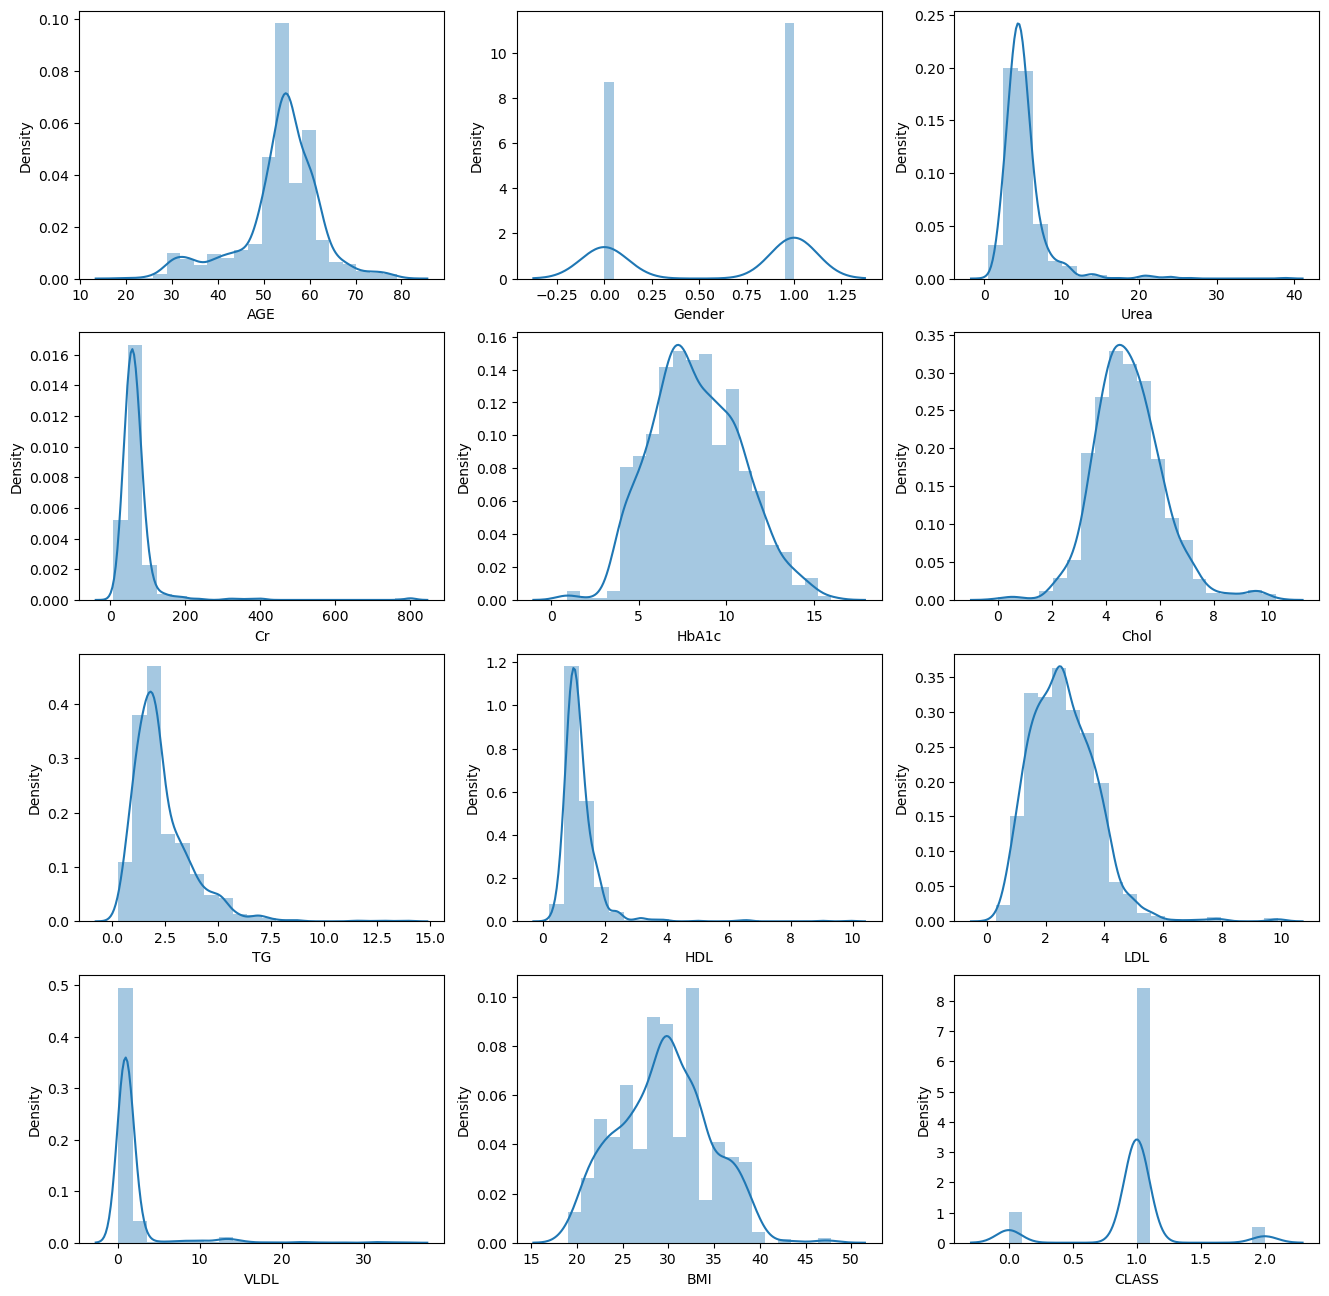

In [13]:
fig, ax = plt.subplots(4,3, figsize=(16,16))
sns.distplot(db.AGE, bins = 20, ax=ax[0,0])
sns.distplot(db.Gender,bins = 20, ax=ax[0,1])
sns.distplot(db.Urea, bins = 20, ax=ax[0,2])
sns.distplot(db.Cr, bins=20, ax=ax[1,0])
sns.distplot(db.HbA1c, bins= 20, ax=ax[1,1])
sns.distplot(db.Chol, bins=20, ax=ax[1,2])
sns.distplot(db.TG, bins= 20, ax=ax[2,0])
sns.distplot(db.HDL, bins=20, ax=ax[2,1])
sns.distplot(db.LDL, bins=20, ax=ax[2,2])
sns.distplot(db.VLDL, bins=20, ax=ax[3,0])
sns.distplot(db.BMI, bins=20, ax=ax[3,1])
sns.distplot(db.CLASS, bins=20, ax=ax[3,2])            
fig.show()

<Axes: >

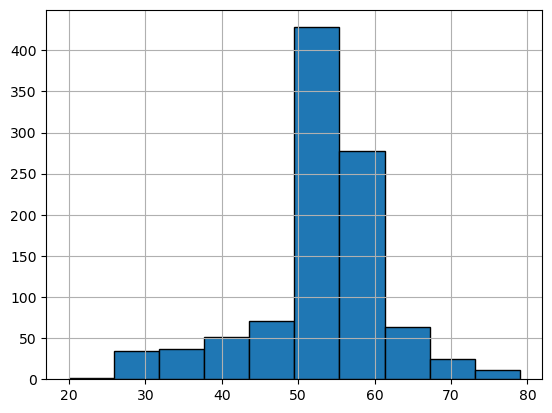

In [14]:
db["AGE"].hist(edgecolor = "black")

<Axes: >

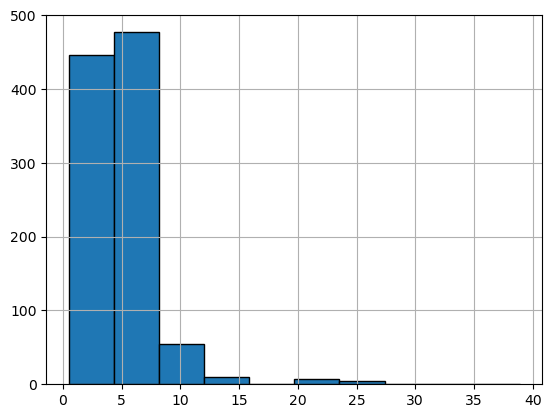

In [15]:
db["Urea"].hist(edgecolor = "black")

<Axes: >

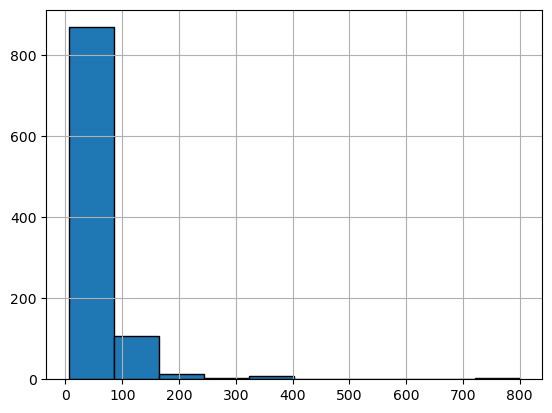

In [16]:
db["Cr"].hist(edgecolor = "black")

<Axes: >

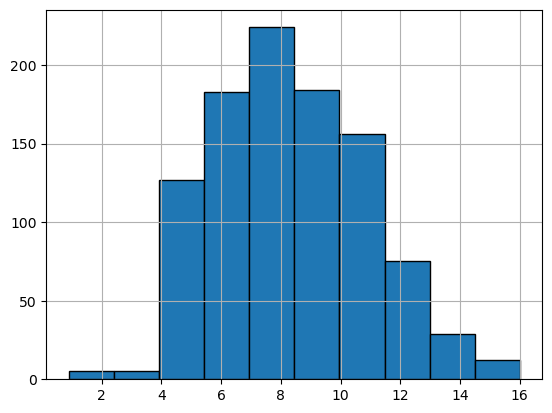

In [17]:
db["HbA1c"].hist(edgecolor = "black")

<Axes: >

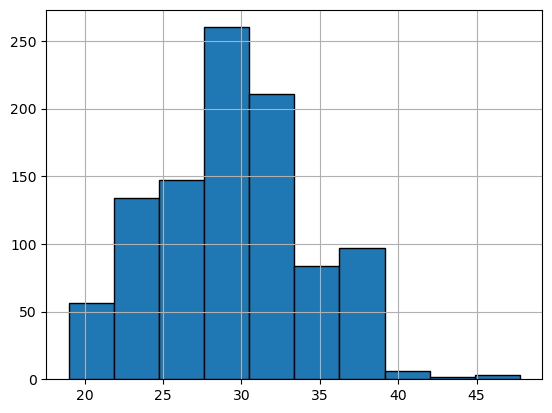

In [18]:
db["BMI"].hist(edgecolor = "black")

In [19]:
db.dtypes

ID             int64
No_Pation      int64
Gender         int64
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS          int64
dtype: object

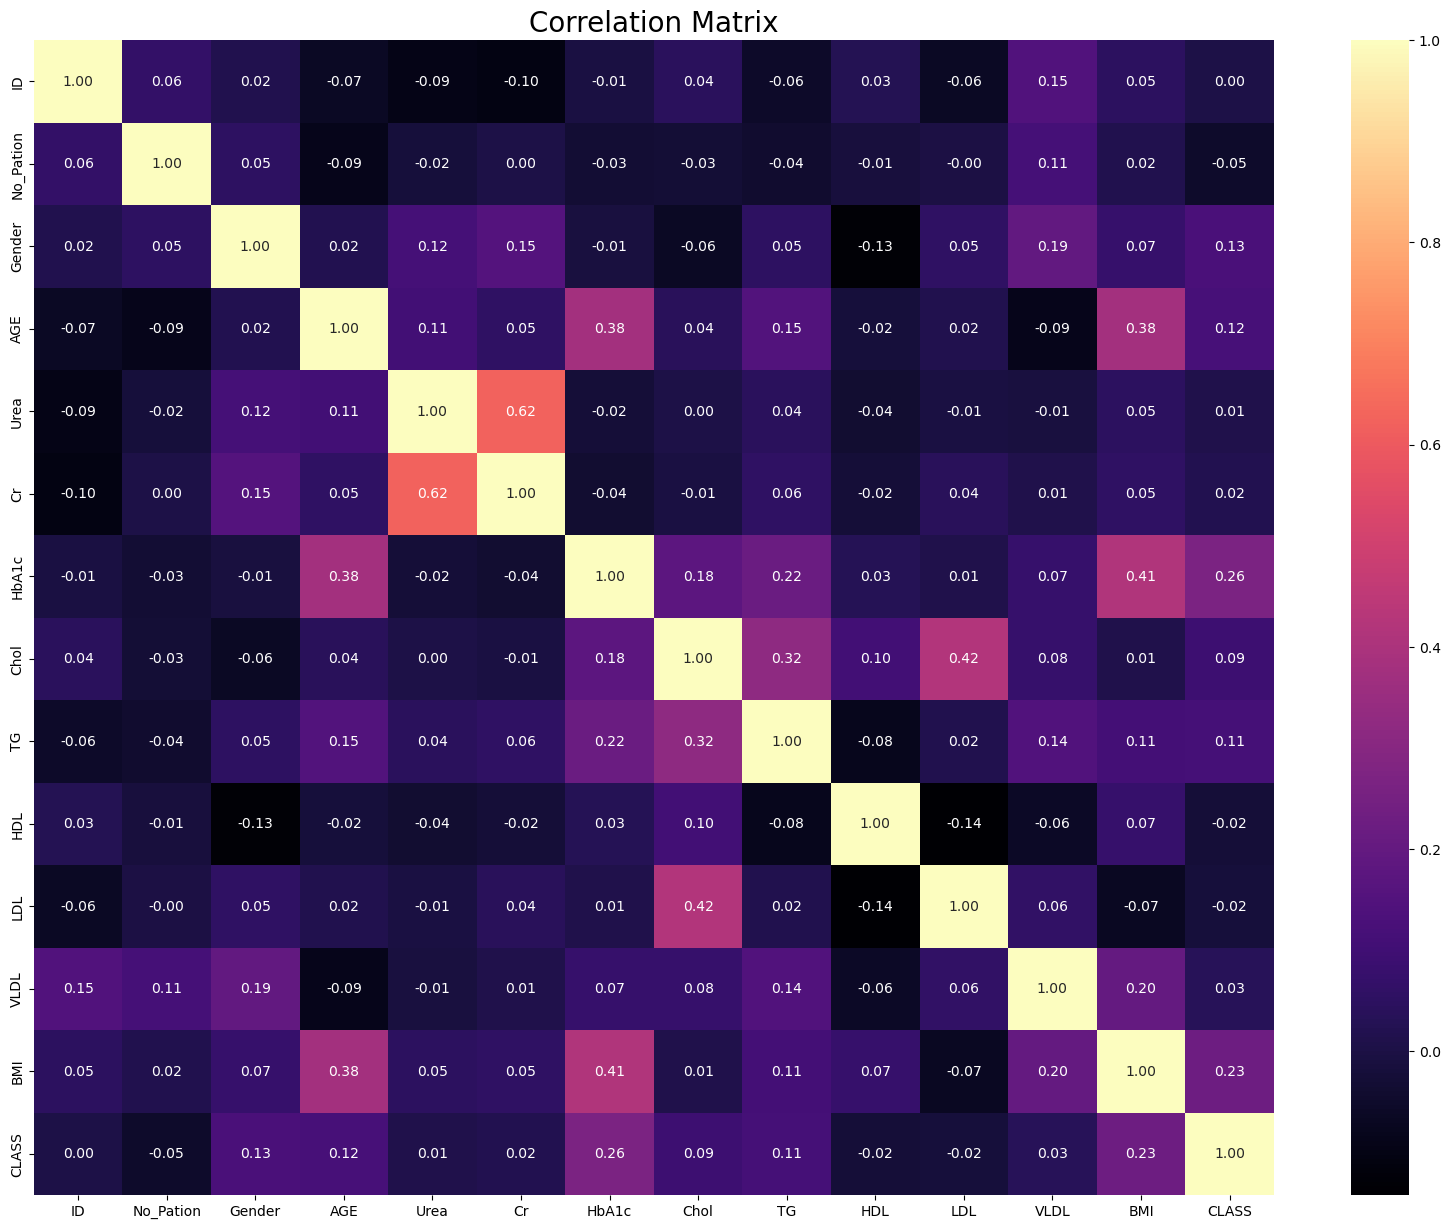

In [20]:
# the correlation matrix is meant to define influence of each cell to another
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(db.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [21]:
# dropping na values 
# db = db.dropna()
# Impute missing values with the mean
db = db.fillna(db.mean())

In [22]:
# Separate the features (X) and the target (y)
X = db.drop(columns=['CLASS'])
y = db['CLASS']

# Perform feature selection using Information Gain
num_features_to_select = 5  # selecting 5 features
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_new = selector.fit_transform(X, y)

In [23]:
# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Model architecture
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=5))
model.add(Dropout(0.5))  # Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dense(32, activation='relu'))  # Add another hidden layer
model.add(Dropout(0.5))  # Add dropout to the second hidden layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8016 - val_loss: 0.4160 - val_accuracy: 0.8250
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.8422 - val_loss: 0.4222 - val_accuracy: 0.8250
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.8438 - val_loss: 0.4088 - val_accuracy: 0.8250
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.8438 - val_loss: 0.3850 - val_accuracy: 0.8250
Epoch 5/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.8438 - val_loss: 0.3600 - val_accuracy: 0.8250
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: -0.0056 - accuracy: 0.8469 - val_loss: 0.3727 - val_accuracy: 0.8250
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: -0.0188 - accuracy: 0.8562 - val_loss: 0.3358 - val_accuracy: 0.8500
Epoc

In [25]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 7.8064 - accuracy: 0.8650
Test Accuracy: 86.50%


In [26]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2)

# Get training accuracy
ann_train_accuracy = history.history['accuracy']

# Get validation accuracy
ann_val_accuracy = history.history['val_accuracy']

# Model evaluation on the test data
loss, ann_test_accuracy = model.evaluate(X_test, y_test)


Epoch 1/50
128/128 [==============================] - 0s 1ms/step - loss: -10.0487 - accuracy: 0.8703 - val_loss: -2.0841 - val_accuracy: 0.8500
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: -10.7042 - accuracy: 0.8766 - val_loss: -2.1809 - val_accuracy: 0.8500
Epoch 3/50
128/128 [==============================] - 0s 1ms/step - loss: -11.9532 - accuracy: 0.8625 - val_loss: -3.5010 - val_accuracy: 0.8750
Epoch 4/50
128/128 [==============================] - 0s 1ms/step - loss: -12.0114 - accuracy: 0.8719 - val_loss: -2.9872 - val_accuracy: 0.8500
Epoch 5/50
128/128 [==============================] - 0s 1ms/step - loss: -13.5027 - accuracy: 0.8750 - val_loss: -3.3974 - val_accuracy: 0.8625
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: -16.1402 - accuracy: 0.8687 - val_loss: -3.2195 - val_accuracy: 0.8500
Epoch 7/50
128/128 [==============================] - 0s 1ms/step - loss: -13.1171 - accuracy: 0.8609 - val_loss: -3.8787 - val_ac

In [27]:
print(f"Test Accuracy: {ann_test_accuracy * 100:.2f}%")
print(f"Final Training Accuracy: {ann_train_accuracy[-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {ann_val_accuracy[-1] * 100:.2f}%")

Test Accuracy: 86.00%
Final Training Accuracy: 87.19%
Final Validation Accuracy: 86.87%


In [28]:
# Model evaluation on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary (0 or 1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"\nAccuracy Score: {accuracy * 100:.2f}%")


7/7 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.19      0.27        21
           1       0.88      0.97      0.92       173
           2       0.00      0.00      0.00         6

    accuracy                           0.86       200
   macro avg       0.44      0.39      0.40       200
weighted avg       0.81      0.86      0.83       200


Confusion Matrix:
[[  4  17   0]
 [  5 168   0]
 [  0   6   0]]

Accuracy Score: 86.00%


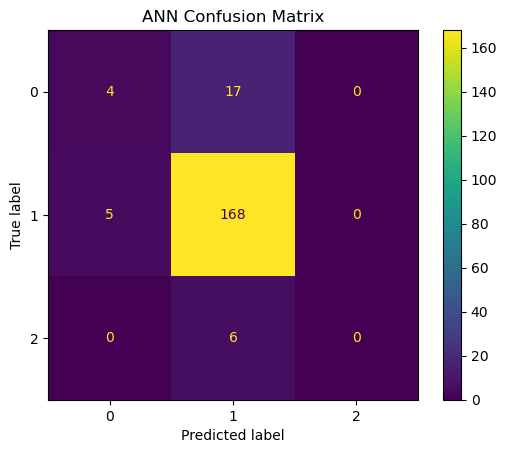

In [31]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('ANN Confusion Matrix')
plt.show()

## GridSearchCV for Random Forest

In [32]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
CLF_optimized = RandomForestClassifier(**best_params, random_state=42)
CLF_optimized.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42)

In [36]:
# Predict labels on training data
CLF_train_optimized = CLF_optimized.predict(X_train)
CLF_test_optimized = CLF_optimized.predict(X_test)
# Calculate training accuracy
rf_train_accuracy = accuracy_score(y_train, CLF_train_optimized)
print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy * 100))

# Calculate test accuracy
rf_test_accuracy = accuracy_score(y_test, CLF_test_optimized)
print("Random Forest Test Accuracy: {:.2f}%".format(rf_test_accuracy * 100))


Random Forest Training Accuracy: 100.00%
Random Forest Test Accuracy: 95.50%


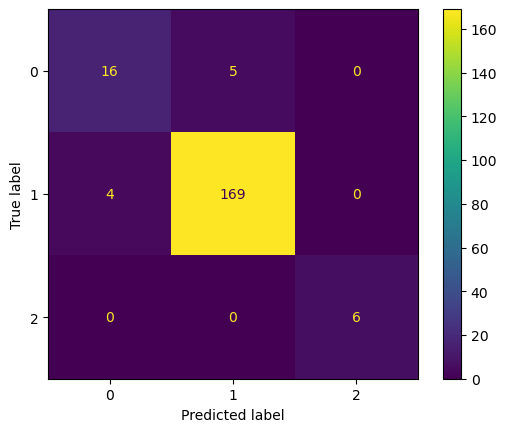

In [37]:
cm = confusion_matrix(y_test, CLF_test_optimized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [38]:
# Predict the classes of the test data using the optimized model
CLF_test_optimized = CLF_optimized.predict(X_test)
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, CLF_test_optimized))
# Calculate F1 score
f1 = f1_score(y_test, CLF_test_optimized, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.97      0.98      0.97       173
           2       1.00      1.00      1.00         6

    accuracy                           0.95       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.95      0.95      0.95       200

F1 Score: 95.45%


# Decision Tree Classifier

In [40]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train )
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate training accuracy
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print("Decision Tree Training Accuracy: {:.2f}%".format(dt_train_accuracy * 100))

# Calculate test accuracy
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print("Decision Tree Test Accuracy: {:.2f}%".format(dt_test_accuracy * 100))

Decision Tree Training Accuracy: 100.00%
Decision Tree Test Accuracy: 96.00%


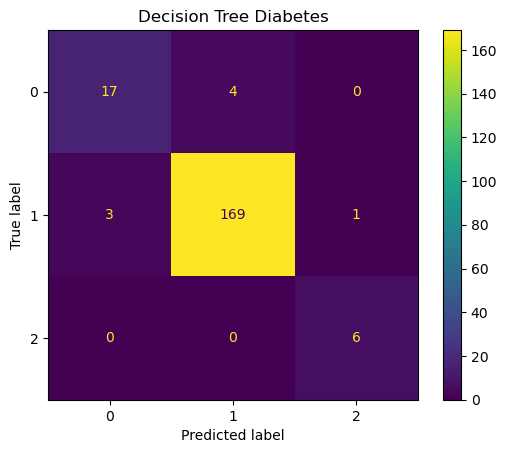

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.98      0.98      0.98       173
           2       0.86      1.00      0.92         6

    accuracy                           0.96       200
   macro avg       0.89      0.93      0.91       200
weighted avg       0.96      0.96      0.96       200

F1 Score: 95.98%


In [51]:
cm = confusion_matrix(y_test, dt_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Decision Tree Diabetes")
plt.show()


# Generate classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_test_pred))
# Calculate F1 score
f1 = f1_score(y_test, dt_test_pred, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

# Support Vector Machine

In [48]:
svm_class = LinearSVC(random_state=42, max_iter=20000)
svm_class.fit(X_train, y_train)

svm_test_pred = svm_class.predict(X_test)
svm_train_pred = svm_class.predict(X_train)

svm_test_acc = accuracy_score(y_test, svm_test_pred)
print("SVM Test Diabetes Accuracy : ", svm_test_acc)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
print("SVM Train Diabetes Accuracy : ", svm_train_acc)

SVM Test Diabetes Accuracy :  0.915
SVM Train Diabetes Accuracy :  0.91125


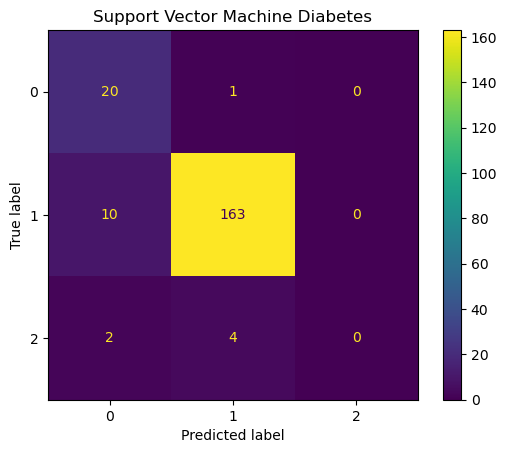

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        21
           1       0.97      0.94      0.96       173
           2       0.00      0.00      0.00         6

    accuracy                           0.92       200
   macro avg       0.53      0.63      0.57       200
weighted avg       0.90      0.92      0.91       200

F1 Score: 90.62%


In [50]:
cm = confusion_matrix(y_test, svm_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Support Vector Machine Diabetes")
plt.show()


# Generate classification report
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_test_pred))
# Calculate F1 score
f1 = f1_score(y_test, svm_test_pred, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

In [63]:
# ann_train_accuracy[-1]
data = {
    'Algorithm': ['ANN', 'Random Forest', 'Decision Tree', 'Support Vector Machine'],
    'Train Accuracy': [ann_train_accuracy[-1], rf_train_accuracy, dt_train_accuracy, svm_train_acc],
    'Test Accuracy': [ann_test_accuracy, rf_test_accuracy, dt_test_accuracy, svm_test_acc],
}

# Creating the DataFrame
results_df = pd.DataFrame(data)

# Displaying the DataFrame
results_df

,Algorithm,Train Accuracy,Test Accuracy
0,ANN,0.871875,0.860
1,Random Forest,1.000000,0.955
2,Decision Tree,1.000000,0.960
3,Support Vector Machine,0.911250,0.915


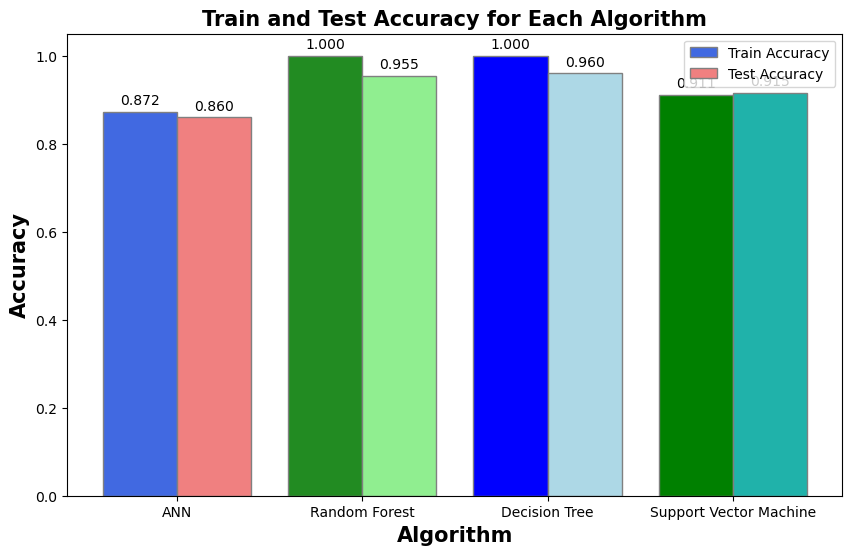

In [64]:
# Ensure 'Train Accuracy' values are numerical
results_df['Train Accuracy'] = results_df['Train Accuracy'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.4

# Positions for bars on X-axis
r1 = range(len(results_df['Algorithm']))
r2 = [x + bar_width for x in r1]

# Colors for bars
colors_train = ['royalblue', 'forestgreen', 'blue', 'green']
colors_test = ['lightcoral', 'lightgreen', 'lightblue', 'lightseagreen']

# Plotting bars for train accuracy
plt.bar(r1, results_df['Train Accuracy'], color=colors_train, width=bar_width, edgecolor='grey', label='Train Accuracy')

# Adding labels for train accuracy
for i, value in enumerate(results_df['Train Accuracy']):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

# Plotting bars for test accuracy
plt.bar(r2, results_df['Test Accuracy'], color=colors_test, width=bar_width, edgecolor='grey', label='Test Accuracy')

# Adding labels for test accuracy
for i, value in enumerate(results_df['Test Accuracy']):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

# Adding legend
plt.legend()

# Adding labels and title
plt.xlabel('Algorithm', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width / 2 for r in range(len(results_df['Algorithm']))], results_df['Algorithm'])
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.title('Train and Test Accuracy for Each Algorithm', fontweight='bold', fontsize=15)

# Display the plot
plt.show()